<a href="https://colab.research.google.com/github/hugopoliveira14/Codigos-CSS/blob/main/CodigoMapeamentoLocalHugo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados sobre a participação na igreja:
      Nome  Idade  Frequência_Mensal  Interesse_Musical
0     Hugo     25                  8                  8
1  Luciene     32                  5                  5
2  Leandro     21                 10                  9
3  Antonio     27                  7                  7
4    Mauro     35                  4                  4
5    Julia     30                  6                  6
6   Valter     20                  9                 10
7  Daniela     28                  7                  7

Estatísticas Descritivas:
           Idade  Frequência_Mensal  Interesse_Musical
count   8.000000               8.00               8.00
mean   27.250000               7.00               7.00
std     5.175492               2.00               2.00
min    20.000000               4.00               4.00
25%    24.000000               5.75               5.75
50%    27.500000               7.00               7.00
75%    30.500000               8.25           

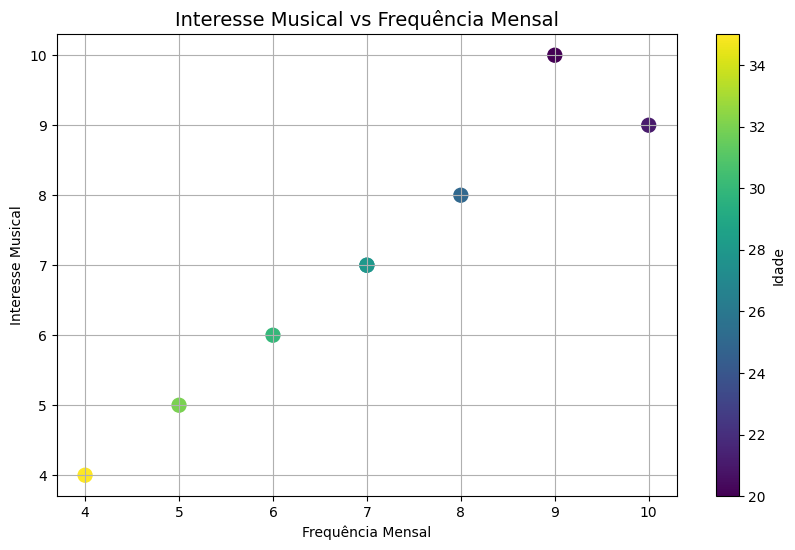

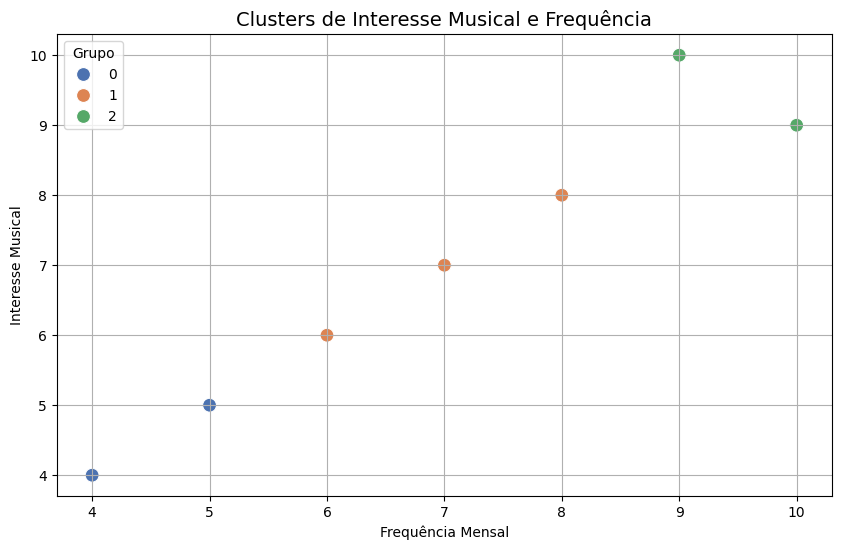


Sugestão de Ações com base nos Clusters:
Grupo 0: Incentivar Luciene, Mauro a participar de treinamentos musicais ou atividades específicas.
Grupo 1: Incentivar Hugo, Antonio, Julia, Daniela a participar de treinamentos musicais ou atividades específicas.
Grupo 2: Incentivar Leandro, Valter a participar de treinamentos musicais ou atividades específicas.


In [5]:
!pip install matplotlib seaborn pandas scikit-learn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Dados simulados
data = {
    'Nome': ['Hugo', 'Luciene', 'Leandro', 'Antonio', 'Mauro', 'Julia', 'Valter', 'Daniela'],
    'Idade': [25, 32, 21, 27, 35, 30, 20, 28],
    'Frequência_Mensal': [8, 5, 10, 7, 4, 6, 9, 7],  # Número de idas à igreja por mês
    'Interesse_Musical': [8, 5, 9, 7, 4, 6, 10, 7],  # Escala de 1 a 10
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Exibindo os primeiros registros do DataFrame
print("Dados sobre a participação na igreja:")
print(df)

# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
print(df.describe())

# Visualização de interesse musical vs frequência mensal
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Frequência_Mensal'], df['Interesse_Musical'],
                       c=df['Idade'], cmap='viridis', s=100)  # Adicionando coloração por Idade
plt.title('Interesse Musical vs Frequência Mensal', fontsize=14)
plt.xlabel('Frequência Mensal')
plt.ylabel('Interesse Musical')
plt.colorbar(scatter, label='Idade')
plt.grid()
plt.show()

# Clustering para identificar grupos com base em frequência e interesse musical
X = df[['Frequência_Mensal', 'Interesse_Musical']]
kmeans = KMeans(n_clusters=3, random_state=0)
df['Grupo'] = kmeans.fit_predict(X)

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Frequência_Mensal', y='Interesse_Musical', hue='Grupo', palette='deep', s=100)
plt.title('Clusters de Interesse Musical e Frequência', fontsize=14)
plt.xlabel('Frequência Mensal')
plt.ylabel('Interesse Musical')
plt.legend(title='Grupo', loc='upper left')
plt.grid()
plt.show()

# Sugestão de ações baseadas nos clusters
print("\nSugestão de Ações com base nos Clusters:")
for grupo in sorted(df['Grupo'].unique()):
    membros = df[df['Grupo'] == grupo]['Nome'].tolist()
    print(f"Grupo {grupo}: Incentivar {', '.join(membros)} a participar de treinamentos musicais ou atividades específicas.")
